<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [1]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib

ModuleNotFoundError: No module named 'pandas'

In [1]:
# Exercise 1 
#   Write a code to load the dataset, split it into training and testing sets, standardize the features, 
#   and convert the data into PyTorch tensors for use in training a PyTorch model. 
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Load the dataset
csv_path = "league_of_legends_data_large.csv"  # adjust if needed
df = pd.read_csv(csv_path)

# Basic sanity checks
assert "win" in df.columns, "Expected target column 'win' not found in CSV."

# Keep only numeric features for modeling (drop any non-numeric cols automatically)
X = df.drop(columns=["win"])
X = X.select_dtypes(include=[np.number])

# Handle inf/nan safely (median impute)
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))

# Target: ensure float32 for binary classification with BCE loss later (0/1)
y = df["win"].astype(np.float32)

# 2) Train/Test split (80/20), stratify keeps class balance if 'win' is binary
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 3) Standardize features (fit on train only, apply to both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled  = scaler.transform(X_test.values)

# 4) Convert to PyTorch tensors
X_train_t = torch.from_numpy(X_train_scaled.astype(np.float32))
X_test_t  = torch.from_numpy(X_test_scaled.astype(np.float32))
y_train_t = torch.from_numpy(y_train.values.astype(np.float32)).view(-1, 1)  # shape (N,1)
y_test_t  = torch.from_numpy(y_test.values.astype(np.float32)).view(-1, 1)

# Quick confirmations
print("X_train:", X_train_t.shape, X_train_t.dtype)
print("y_train:", y_train_t.shape, y_train_t.dtype)
print("X_test :", X_test_t.shape,  X_test_t.dtype)
print("y_test :", y_test_t.shape,  y_test_t.dtype)


X_train: torch.Size([800, 8]) torch.float32
y_train: torch.Size([800, 1]) torch.float32
X_test : torch.Size([200, 8]) torch.float32
y_test : torch.Size([200, 1]) torch.float32


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [3]:
## code
import torch
import torch.nn as nn
import torch.optim as optim

class logistic_regression(nn.Module):
    def __init__(self,in_size):
        super(logistic_regression,self).__init__()
        self.linear = nn.Linear(in_size,1)

    def forward(self,x):
        x = torch.sigmoid(self.linear(x))
        return x 


# 2) Initialize
input_dim = X_train_t.shape[1]          # number of features
model = logistic_regression(input_dim)  # create model

loss_fn = nn.BCELoss()                   # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

# (Optional) quick sanity check forward pass
with torch.no_grad():
    y_hat = model(X_train_t[:5])
print("Input dim:", input_dim)
print("Sample preds shape:", y_hat.shape)
print("Model params:", sum(p.numel() for p in model.parameters()))




Input dim: 8
Sample preds shape: torch.Size([5, 1])
Model params: 9


In [8]:
X_train_t.shape[0]

800

In [9]:
y_train_t

tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
      

### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [12]:
# John's code here
# use loader
from torch.utils.data import TensorDataset, DataLoader
train_ds = TensorDataset(X_train_t, y_train_t)
test_ds  = TensorDataset(X_test_t, y_test_t)
train_loader = DataLoader(train_ds, batch_size=64)

# 1 Set number of epochs:
#loss_fn = nn.BCELoss() (define in previous cell)
criterion = loss_fn       # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(),lr=0.01)

# --- Training loop ---
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    model.train() # make sure its switch to this
    running_loss = 0.0

    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()                 # zero grads
        y_hat = model(x_batch)                # forward
        loss = criterion(y_hat, y_batch)      # loss
        loss.backward()                       # backprop
        optimizer.step()                      # update

        running_loss += loss.item() * x_batch.size(0)

    # print every 100 epochs
    if epoch % 100 == 0:
        avg_loss = running_loss / len(train_ds)
        print(f"Epoch {epoch:4d}/{num_epochs} - Loss: {avg_loss:.6f}")

# --- Evaluation ---
model.eval()
with torch.no_grad():
    # predictions on full train/test tensors
    y_train_pred = model(X_train_t)
    y_test_pred  = model(X_test_t)

# threshold at 0.5 for binary classification
y_train_cls = (y_train_pred >= 0.5).float()
y_test_cls  = (y_test_pred  >= 0.5).float()

# accuracies
train_acc = (y_train_cls.eq(y_train_t).sum().item()) / y_train_t.numel()
test_acc  = (y_test_cls.eq(y_test_t).sum().item())  / y_test_t.numel()

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f" Test Accuracy: {test_acc*100:.2f}%")

Epoch  100/100 - Loss: 0.690610
Train Accuracy: 52.00%
 Test Accuracy: 54.50%


In [ ]:
"""
John note aug-2025:  Bring me to life...

=====     why use  y_train_cls.eq(y_train_t).sum().item())  explain ========
cls.eq  << used to comprew the extace label
.sum() used to count all True , as [30] 0-dimention tensor...
.item() unpack, pick the 30 number out, so you can do divide direcly....
==========================================================================

"""

## noete



### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [13]:
## Write your code here
input_dim = X_train_t.shape[1]
model = logistic_regression(input_dim)

# Loss = BCE (since forward() has sigmoid)
criterion = nn.BCELoss()

# --- DataLoader (you can change batch_size if you like; 32 works well for 800 samples) ---
train_ds = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# --- Optimizer with L2 regularization (weight decay) ---
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# --- Train for 1000 epochs ---
num_epochs = 1000
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        yhat = model(xb)
        loss = criterion(yhat, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)

    if epoch % 100 == 0:
        avg_loss = running_loss / len(train_ds)
        print(f"Epoch {epoch:4d}/{num_epochs} - Loss: {avg_loss:.6f}")

# --- Evaluation (threshold = 0.5) ---
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_t)
    y_test_pred  = model(X_test_t)

y_train_cls = (y_train_pred >= 0.5).float()
y_test_cls  = (y_test_pred  >= 0.5).float()

train_acc = (y_train_cls.eq(y_train_t).sum().item()) / y_train_t.numel()
test_acc  = (y_test_cls.eq(y_test_t).sum().item())  / y_test_t.numel()

print(f"Train Accuracy (L2): {train_acc*100:.2f}%")
print(f" Test Accuracy (L2): {test_acc*100:.2f}%")


Epoch  100/1000 - Loss: 0.690624
Epoch  200/1000 - Loss: 0.690667
Epoch  300/1000 - Loss: 0.690724
Epoch  400/1000 - Loss: 0.690598
Epoch  500/1000 - Loss: 0.690637
Epoch  600/1000 - Loss: 0.690630
Epoch  700/1000 - Loss: 0.690610
Epoch  800/1000 - Loss: 0.690633
Epoch  900/1000 - Loss: 0.690621
Epoch 1000/1000 - Loss: 0.690642
Train Accuracy (L2): 52.25%
 Test Accuracy (L2): 54.00%


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


Confusion Matrix — TRAIN
[[163 229]
 [153 255]]

Confusion Matrix — TEST
[[43 55]
 [37 65]]

Classification Report — TRAIN
              precision    recall  f1-score   support

           0      0.516     0.416     0.460       392
           1      0.527     0.625     0.572       408

    accuracy                          0.522       800
   macro avg      0.521     0.520     0.516       800
weighted avg      0.521     0.522     0.517       800


Classification Report — TEST
              precision    recall  f1-score   support

           0      0.537     0.439     0.483        98
           1      0.542     0.637     0.586       102

    accuracy                          0.540       200
   macro avg      0.540     0.538     0.534       200
weighted avg      0.540     0.540     0.535       200


ROC AUC — TRAIN: 0.545
ROC AUC — TEST : 0.585


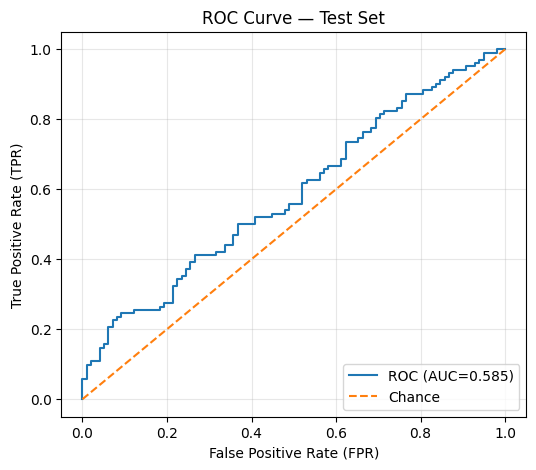

In [14]:
# === Exercise 5: Post‑training evaluation & visualization ===
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# ---- 1) Probabilities & class labels (threshold = 0.5) ----
model.eval()
with torch.no_grad():
    y_train_prob = model(X_train_t).cpu().numpy().ravel()
    y_test_prob  = model(X_test_t ).cpu().numpy().ravel()

y_train_pred = (y_train_prob >= 0.5).astype(int)
y_test_pred  = (y_test_prob  >= 0.5).astype(int)

y_train_true = y_train_t.cpu().numpy().ravel().astype(int)
y_test_true  = y_test_t.cpu().numpy().ravel().astype(int)

# ---- 2) Confusion matrices ----
cm_train = confusion_matrix(y_train_true, y_train_pred)
cm_test  = confusion_matrix(y_test_true,  y_test_pred)

print("Confusion Matrix — TRAIN")
print(cm_train)
print("\nConfusion Matrix — TEST")
print(cm_test)

# ---- 3) Classification reports (precision, recall, F1) ----
print("\nClassification Report — TRAIN")
print(classification_report(y_train_true, y_train_pred, digits=3))
print("\nClassification Report — TEST")
print(classification_report(y_test_true,  y_test_pred,  digits=3))

# ---- 4) ROC & AUC (use probabilities, not hard labels) ----
fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_prob)
fpr_test,  tpr_test,  _ = roc_curve(y_test_true,  y_test_prob)

auc_train = roc_auc_score(y_train_true, y_train_prob)
auc_test  = roc_auc_score(y_test_true,  y_test_prob)

print(f"\nROC AUC — TRAIN: {auc_train:.3f}")
print(f"ROC AUC — TEST : {auc_test:.3f}")

# ---- 5) Plot ROC (TEST) ----
plt.figure(figsize=(6,5))
plt.plot(fpr_test, tpr_test, label=f"ROC (AUC={auc_test:.3f})")
plt.plot([0,1], [0,1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve — Test Set")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [21]:
X_train_t.shape[1]

8

In [23]:
## Exercise 6: Save and Load the Trained Model

import torch

# === Save the model's state dictionary (weights & biases) ===
torch.save(model.state_dict(), "logreg_model.pth")
print("✅ Model saved as 'logreg_model.pth'")

# === Load the model into a new instance ===
# Remember to use the same architecture class !!
loaded_model = logistic_regression(X_train_t.shape[1])
loaded_model.load_state_dict(torch.load("logreg_model.pth"))

# Ensure the loaded model is in evaluation mode
loaded_model.eval()



with torch.no_grad():
    outputs = loaded_model(X_test_t)
    predicted = (outputs >= 0.5).float()  # threshold at 0.5
    accuracy = (predicted.eq(y_test_t).sum().item()) / y_test_t.size(0) * 100

print(f"✅ Accuracy of the loaded model on test data: {accuracy:.2f}%")


✅ Model saved as 'logreg_model.pth'
✅ Accuracy of the loaded model on test data: 54.00%


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [27]:

def train_and_valid(lr, epochs=100, batch_size=32, weight_decay=0.0):

    input_dim = X_train_t.shape[1]
    model = logistic_regression(input_dim)

    # Loss = BCE (since forward() has sigmoid)
    criterion = nn.BCELoss()

    # --- DataLoader (you can change batch_size if you like; 32 works well for 800 samples) ---
    train_ds = TensorDataset(X_train_t, y_train_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    
    # --- Optimizer with L2 regularization (weight decay) ---
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay) # weight_decay = 0.01
    
    # --- Train for 1000 epochs ---
    for epoch in range(1, epochs + 1):
        model.train()
        running_loss = 0.0
    
        for xb, yb in train_loader:
            optimizer.zero_grad()
            yhat = model(xb)
            loss = criterion(yhat, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
    
        if epoch % 100 == 0:
            avg_loss = running_loss / len(train_ds)
            print(f"Epoch {epoch:4d}/{num_epochs} - Loss: {avg_loss:.6f}")


        # --- Evaluation (threshold = 0.5) ---
        model.eval()
        with torch.no_grad():
            y_train_pred = model(X_train_t)
            y_test_pred  = model(X_test_t)
        
        y_train_cls = (y_train_pred >= 0.5).float()
        y_test_cls  = (y_test_pred  >= 0.5).float()
        
        train_acc = (y_train_cls.eq(y_train_t).sum().item()) / y_train_t.numel()
        test_acc  = (y_test_cls.eq(y_test_t).sum().item())  / y_test_t.numel()

        return train_acc, test_acc



In [28]:
## Write your code here
# LRs to test
learning_rates = [0.01, 0.05, 0.1]

epochs_fine = 1000
batch_size_fine= 32
weight_decay_fine = 0.01

results = []

for lr in learning_rates:
    train_acc, test_acc = train_and_valid(lr, epochs=epochs_fine, batch_size=batch_size_fine, weight_decay=weight_decay_fine)
    results.append((lr, train_acc, test_acc))
    print(f"LR={lr:.3f} -> Train Acc: {train_acc*100:.2f}% | Test Acc: {test_acc*100:.2f}%")




# Pick best by test accuracy
# results (lr, train_acc, test_acc) !!! lol

best_lr, best_train, best_test = max(results, key=lambda x: x[2])
print("\nBest LR:", best_lr)
print(f"Best LR Train Acc: {best_train*100:.2f}% | Best LR Test Acc: {best_test*100:.2f}%")



LR=0.010 -> Train Acc: 50.75% | Test Acc: 50.00%
LR=0.050 -> Train Acc: 49.00% | Test Acc: 52.50%
LR=0.100 -> Train Acc: 50.62% | Test Acc: 58.00%

Best LR: 0.1
Best LR Train Acc: 50.62% | Best LR Test Acc: 58.00%


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


Top feature weights (by |weight|):
        feature    weight  abs_weight
0  damage_dealt -0.078952    0.078952
1  wards_placed  0.078752    0.078752
2   gold_earned  0.061294    0.061294
3         kills  0.054065    0.054065
4        deaths -0.013353    0.013353
5            cs -0.009362    0.009362
6  wards_killed -0.003093    0.003093
7       assists  0.001338    0.001338


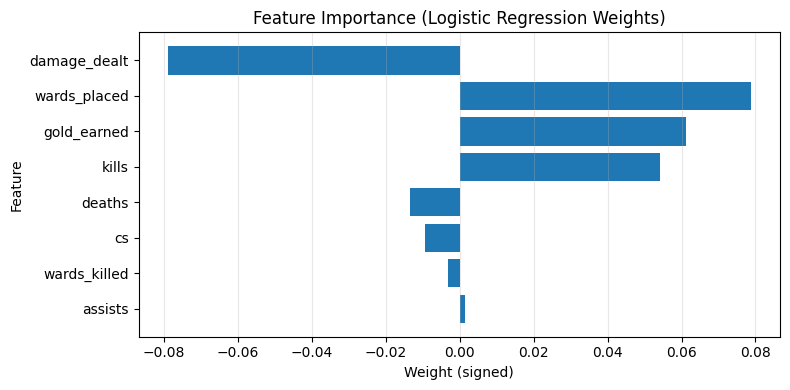


Interpretation:
- Larger |weight| → more influence on prediction (since inputs are standardized).
- Positive weight → increases predicted probability of class 1.
- Negative weight → decreases predicted probability of class 1.


In [29]:
# Exercise 8 — Feature Importance from Logistic Regression Weights

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

# 1) Extract learned weights (shape: [1, n_features])
w = model.linear.weight.detach().cpu().numpy().ravel()

# 2) Get feature names (prefer your original X_train DataFrame)
if 'X_train' in globals():
    feature_names = X_train.columns.tolist()
elif 'df' in globals():
    feature_names = (
        df.drop(columns=['win']).select_dtypes(include=[np.number]).columns.tolist()
    )
else:
    feature_names = [f'feat_{i}' for i in range(len(w))]

# Safety: align lengths
if len(feature_names) != len(w):
    feature_names = feature_names[:len(w)]

# 3) Build importance DataFrame
imp_df = pd.DataFrame({
    'feature': feature_names,
    'weight': w
})
imp_df['abs_weight'] = imp_df['weight'].abs()

# 4) Sort by absolute importance (largest first)
imp_df_sorted = imp_df.sort_values('abs_weight', ascending=False).reset_index(drop=True)

# (Optional) show top rows in text
print("Top feature weights (by |weight|):")
print(imp_df_sorted.head(15))

# 5) Plot bar chart (top-K most important features, signed weights)
TOP_K = min(20, len(imp_df_sorted))  # show up to 20
top = imp_df_sorted.head(TOP_K)

plt.figure(figsize=(8, max(4, TOP_K * 0.35)))
plt.barh(top['feature'], top['weight'])
plt.title('Feature Importance (Logistic Regression Weights)')
plt.xlabel('Weight (signed)')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # largest on top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Quick interpretation tip:
print("\nInterpretation:")
print("- Larger |weight| → more influence on prediction (since inputs are standardized).")
print("- Positive weight → increases predicted probability of class 1.")
print("- Negative weight → decreases predicted probability of class 1.")


        Feature  Importance
5  wards_placed    0.078752
3   gold_earned    0.061294
0         kills    0.054065
2       assists    0.001338
6  wards_killed   -0.003093
4            cs   -0.009362
1        deaths   -0.013353
7  damage_dealt   -0.078952


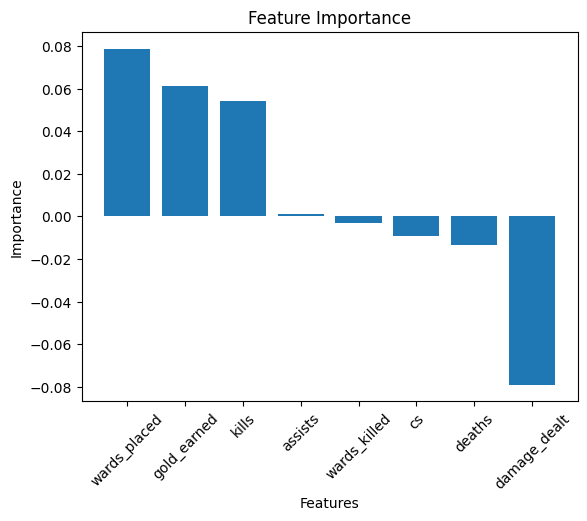

In [32]:
## Ibm answer 

weights = model.linear.weight.data.numpy().flatten()
features = X.columns

#Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

#Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

## Laerning Note and next you can further do for this lab aug-2025

### Notes on Feature Importance (Exercise 8)
- `damage_dealt` came out **negative** → possibly because losing teams pad damage without converting it into kills/objectives.  
- `wards_placed` positive → vision strongly linked to wins.  
- `gold_earned` positive → economic advantage snowballs into victory.  
- `kills` positive → higher kill counts align with winning.  

Next step: Try **normalizing `damage_dealt`** (e.g., per minute, per gold, per kill) to see if the relationship flips to positive and becomes more intuitive.


Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
